# Importation des bibliothèques

In [870]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Chargement et Nettoyage du questionnaire

**Nota** : Avant leur import, les résultats du questionnaire ont été nettoyées des quelques données personnelles insérées dans les commentaires.

In [871]:
df = pd.read_csv("V1.1_recrutement_et_IA_sauf noms.csv", header=[1], sep=";")

## Contrôle visuel du questionnaire

In [872]:
df.head(10)

,Colonnes,SID,Heure de soumission,Heure de complétion,Heure de modification,Brouillon,Adresse IP,UID,Nom d'utilisateur,Rédiger des CV ou des lettres de motivation,...,Lors de la négociation sur votre rémunération et autres avantages,Lors de la rédaction de votre contrat de travail,Le respect de votre vie privée,L'empreinte carbone de l'IA utilisée,L'absence de toute discrimination,L'équité entre tous les candidats,Le respect de la diversité,Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?,Quelle est votre tranche d'âge?,Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA :
0,3,25290150,11/01/2025 - 20:28,11/01/2025 - 20:28,11/01/2025 - 20:28,0,0.0.0.0,0,Anonymous,Plutôt opposé,...,"Ni réticent, ni favorable",Favorable,C'est plutôt important,C'est important ou secondaire,C'est très important,C'est très important,C'est important ou secondaire,C'est important,25-34 ans,NaN
1,4,25290276,11/01/2025 - 20:51,11/01/2025 - 20:51,11/01/2025 - 20:51,0,0.0.0.0,0,Anonymous,Totalement opposé,...,Très réticent,Réticent,C'est plutôt important,NaN,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans,NaN
2,5,25290441,11/01/2025 - 21:18,11/01/2025 - 21:18,11/01/2025 - 21:18,0,0.0.0.0,0,Anonymous,Assez favorable,...,Réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est important,45-54 ans,NaN
3,6,25291335,12/01/2025 - 03:53,12/01/2025 - 03:53,12/01/2025 - 03:53,0,0.0.0.0,0,Anonymous,Tout à fait favorable,...,Très réticent,"Ni réticent, ni favorable",C'est plutôt important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est essentiel,55-64 ans,NaN
4,7,25291387,12/01/2025 - 06:52,12/01/2025 - 06:52,12/01/2025 - 06:52,0,0.0.0.0,0,Anonymous,"Ni favorable, ni opposé",...,Réticent,"Ni réticent, ni favorable",C'est très secondaire,NaN,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Je connais très peu l'IA et dois me faire expl...
5,8,25291456,12/01/2025 - 07:52,12/01/2025 - 07:52,12/01/2025 - 07:52,0,0.0.0.0,0,Anonymous,Assez favorable,...,Réticent,"Ni réticent, ni favorable",C'est très important,C'est très important,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est essentiel,55-64 ans,NaN
6,9,25291533,12/01/2025 - 08:27,12/01/2025 - 08:27,12/01/2025 - 08:27,0,0.0.0.0,0,Anonymous,Assez favorable,...,Très réticent,Très réticent,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est très important,C'est plutôt important,C'est important,25-34 ans,NaN
7,10,25291545,12/01/2025 - 08:30,12/01/2025 - 08:30,12/01/2025 - 08:30,0,0.0.0.0,0,Anonymous,Tout à fait favorable,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très important,C'est très important,C'est très secondaire,C'est essentiel,55-64 ans,Elle ne vaut pas un clou
8,11,25291576,12/01/2025 - 08:37,12/01/2025 - 08:37,12/01/2025 - 08:37,0,0.0.0.0,0,Anonymous,Totalement opposé,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Cela caractérise le niveau de servilité du rec...
9,12,25291608,12/01/2025 - 08:47,12/01/2025 - 08:47,12/01/2025 - 08:47,0,0.0.0.0,0,Anonymous,Assez favorable,...,Très réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est important,55-64 ans,NaN


## Suppression des colonnes à caractère technique sans données liées aux questions

In [873]:
df = df.drop(df.columns[0:9], axis=1)

In [874]:
df.head(2)

,Rédiger des CV ou des lettres de motivation,Améliorer votre profil LinkedIn,Préparer des entretiens d'embauche,Vous renseigner sur votre futur employeur,Répondre plus rapidement à une offre,ChatGPT et autres IA génératives (génération de texte ou d'images),"Moteur de recherche (Chrome, Safari, Firefox)",Application de navigation disponibles sur votre mobile ou dans votre voiture,Autres usages professionnels ou scientifiques,Pour sélectionner les meilleur•e•s candidat•e•s,...,Lors de la négociation sur votre rémunération et autres avantages,Lors de la rédaction de votre contrat de travail,Le respect de votre vie privée,L'empreinte carbone de l'IA utilisée,L'absence de toute discrimination,L'équité entre tous les candidats,Le respect de la diversité,Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?,Quelle est votre tranche d'âge?,Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA :
0,Plutôt opposé,Assez favorable,Totalement opposé,Plutôt opposé,Assez favorable,à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Très faible,...,"Ni réticent, ni favorable",Favorable,C'est plutôt important,C'est important ou secondaire,C'est très important,C'est très important,C'est important ou secondaire,C'est important,25-34 ans,NaN
1,Totalement opposé,Plutôt opposé,Plutôt opposé,"Ni favorable, ni opposé","Ni favorable, ni opposé",Plutôt à l'aise,à l'aise,Plutôt à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Très réticent,Réticent,C'est plutôt important,NaN,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans,NaN


In [876]:
df.describe()

,Rédiger des CV ou des lettres de motivation,Améliorer votre profil LinkedIn,Préparer des entretiens d'embauche,Vous renseigner sur votre futur employeur,Répondre plus rapidement à une offre,ChatGPT et autres IA génératives (génération de texte ou d'images),"Moteur de recherche (Chrome, Safari, Firefox)",Application de navigation disponibles sur votre mobile ou dans votre voiture,Autres usages professionnels ou scientifiques,Pour sélectionner les meilleur•e•s candidat•e•s,...,Lors de la négociation sur votre rémunération et autres avantages,Lors de la rédaction de votre contrat de travail,Le respect de votre vie privée,L'empreinte carbone de l'IA utilisée,L'absence de toute discrimination,L'équité entre tous les candidats,Le respect de la diversité,Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?,Quelle est votre tranche d'âge?,Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA :
count,161,161,161,161,161,161,161,161,161,161,...,161,161,161,159,161,161,159,161,161,67
unique,5,5,5,5,5,5,5,5,5,4,...,5,5,4,5,5,4,5,5,5,67
top,Tout à fait favorable,Assez favorable,Tout à fait favorable,Tout à fait favorable,Assez favorable,Plutôt à l'aise,à l'aise,à l'aise,Plutôt à l'aise,Faible,...,Très réticent,Très réticent,C'est très important,C'est plutôt important,C'est très important,C'est très important,C'est très important,C'est important,55-64 ans,Je connais très peu l'IA et dois me faire expl...
freq,52,54,52,45,47,56,90,75,61,57,...,74,44,124,40,68,88,51,63,60,1


## Simplification du nommage des colonnes du questionnaire

**Le questionnaire est organisé en 6 rubriques comportant chacune des sous-questions:**
- Rubrique 1 : utilité perçue de l'usage de l'IA dans un recrutement;
- Rubrique 2 : facilité d'usage de l'IA en général;
- Rubrique 3 : confiance dans l'usage dans le recruteur utilisant une IA;
- Rubrique 4 : acceptation de l'usage de l'IA par le recruteur;
- Rubrique 5 : importance accordée à l'éthique dans l'usage de l'IA;
- Rubrique 6 : divers, comme l'importance accordée à l'information sur l'usage de l'IA, la catégorie d'âge et un champ de texte libre.

### Mapping des colonnes par catégorie

In [720]:
import collections

In [721]:
dict_usefulness_columns = collections.OrderedDict({"Rédiger des CV ou des lettres de motivation": "useful_resume_CV",
                  "Améliorer votre profil LinkedIn": "useful_linkedin",
                  "Préparer des entretiens d'embauche": "useful_interview",
                  "Vous renseigner sur votre futur employeur": "useful_intelligence",
                  "Répondre plus rapidement à une offre": "useful_speedy_response"
                  })

In [722]:
dict_easiness_columns = collections.OrderedDict({"ChatGPT et autres IA génératives (génération de texte ou d'images)": "easiness_generative_AI",
                  "Moteur de recherche (Chrome, Safari, Firefox)": "easiness_search_engine",
                  "Application de navigation disponibles sur votre mobile ou dans votre voiture": "easiness_navigation",
                  "Autres usages professionnels ou scientifiques": "easiness_business_sciences"
                  })

In [723]:
dict_trust_columns = collections.OrderedDict({"Pour sélectionner les meilleur•e•s candidat•e•s": "trust_best_applicants",
                   "Pour réduire le risque de discrimination" : "trust_discrimination",
                    "Pour un recrutement plus éthique": "trust_ethics",
                    "Pour diversifier les recrutements": "trust_diversity"
                  })

In [724]:
dict_acceptance_columns = collections.OrderedDict({"Lors du tri initial des candidatures": "acceptance_sorting_resumes",
                        "Lors des tests de sélection": "acceptance_selection_tests",
                        "Lors des entretiens individuels": "acceptance_interviews",
                        "Lors de la discussion sur le périmètre de votre poste": "acceptance_negotiation",
                        "Lors de la négociation sur votre rémunération et autres avantages": "acceptance_wages_package",
                        "Lors de la rédaction de votre contrat de travail": "acceptance_contract"
                       })

In [725]:
dict_ethics_columns = collections.OrderedDict({"Le respect de votre vie privée": "ethics_privacy",
                        "L\'empreinte carbone de l\'IA utilisée": "ethics_carbon_footprint",
                        "L\'absence de toute discrimination": "ethics_no_discrimination",
                        "L\'équité entre tous les candidats": "ethics_fairness_for_applicants",
                        "Le respect de la diversité": "ethics_diversity"
                        })

In [726]:
dict_misc_columns = collections.OrderedDict(
    {"Aimeriez-vous savoir si votre recruteur a prévu d\'utiliser l\'IA dans le processus de recrutement ?": "misc_recruiter_uses_AI",
    "Quelle est votre tranche d\'âge?": "misc_age_category",
    "Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA : ": "misc_free_text"
    })

### Renommage des colonnes

In [727]:
# rename columns dealing with usefulness
df = df.rename(columns=dict_usefulness_columns)

In [728]:
# rename columns dealing with easiness of use
df = df.rename(columns=dict_easiness_columns)

In [729]:
# rename columns dealing with trust
df = df.rename(columns=dict_trust_columns)

In [730]:
# rename columns dealing with acceptance
df = df.rename(columns=dict_acceptance_columns)

In [731]:
# Rename columns dealing with ethics
df = df.rename(columns=dict_ethics_columns)

In [732]:
# Rename miscellaneous questions
df = df.rename(columns=dict_misc_columns)

In [733]:
df.head(10)

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences,trust_best_applicants,...,acceptance_wages_package,acceptance_contract,ethics_privacy,ethics_carbon_footprint,ethics_no_discrimination,ethics_fairness_for_applicants,ethics_diversity,misc_recruiter_uses_AI,misc_age_category,misc_free_text
0,Plutôt opposé,Assez favorable,Totalement opposé,Plutôt opposé,Assez favorable,à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Très faible,...,"Ni réticent, ni favorable",Favorable,C'est plutôt important,C'est important ou secondaire,C'est très important,C'est très important,C'est important ou secondaire,C'est important,25-34 ans,NaN
1,Totalement opposé,Plutôt opposé,Plutôt opposé,"Ni favorable, ni opposé","Ni favorable, ni opposé",Plutôt à l'aise,à l'aise,Plutôt à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Très réticent,Réticent,C'est plutôt important,NaN,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans,NaN
2,Assez favorable,Tout à fait favorable,Tout à fait favorable,Plutôt opposé,Tout à fait favorable,Plutôt à l'aise,Plutôt à l'aise,"Ni aisance, ni difficultés","Ni aisance, ni difficultés",Très faible,...,Réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est important,45-54 ans,NaN
3,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Plutôt à l'aise,à l'aise,à l'aise,à l'aise,Faible,...,Très réticent,"Ni réticent, ni favorable",C'est plutôt important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est essentiel,55-64 ans,NaN
4,"Ni favorable, ni opposé",Plutôt opposé,Assez favorable,"Ni favorable, ni opposé","Ni favorable, ni opposé",Quelques difficultés,En difficulté,En difficulté,Quelques difficultés,"Ni faible, ni élevé",...,Réticent,"Ni réticent, ni favorable",C'est très secondaire,NaN,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Je connais très peu l'IA et dois me faire expl...
5,Assez favorable,Assez favorable,Assez favorable,Tout à fait favorable,Assez favorable,"Ni aisance, ni difficultés",à l'aise,à l'aise,à l'aise,Faible,...,Réticent,"Ni réticent, ni favorable",C'est très important,C'est très important,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est essentiel,55-64 ans,NaN
6,Assez favorable,Assez favorable,"Ni favorable, ni opposé",Assez favorable,Assez favorable,Plutôt à l'aise,à l'aise,à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Très réticent,Très réticent,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est très important,C'est plutôt important,C'est important,25-34 ans,NaN
7,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,à l'aise,à l'aise,à l'aise,à l'aise,Faible,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très important,C'est très important,C'est très secondaire,C'est essentiel,55-64 ans,Elle ne vaut pas un clou
8,Totalement opposé,Totalement opposé,Totalement opposé,Assez favorable,Totalement opposé,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Très faible,...,Très réticent,Très réticent,C'est très important,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans,Cela caractérise le niveau de servilité du rec...
9,Assez favorable,Tout à fait favorable,"Ni favorable, ni opposé",Tout à fait favorable,Assez favorable,"Ni aisance, ni difficultés",Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Faible,...,Très réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est important,55-64 ans,NaN


### Création de Dataframes spécialisés

#### Création d'un Dataframe sur l'âge et l'acceptation

In [734]:
df_age_acceptance = df[["misc_age_category", "acceptance_sorting_resumes", "acceptance_selection_tests", "acceptance_interviews", "acceptance_negotiation", "acceptance_wages_package", "acceptance_contract"]]

In [735]:
df_age_acceptance.head()

,misc_age_category,acceptance_sorting_resumes,acceptance_selection_tests,acceptance_interviews,acceptance_negotiation,acceptance_wages_package,acceptance_contract
0,25-34 ans,"Ni réticent, ni favorable",Réticent,Très réticent,Favorable,"Ni réticent, ni favorable",Favorable
1,45-54 ans,"Ni réticent, ni favorable",Réticent,Très réticent,Réticent,Très réticent,Réticent
2,45-54 ans,Réticent,Réticent,Réticent,Réticent,Réticent,Favorable
3,55-64 ans,Réticent,"Ni réticent, ni favorable",Réticent,Très réticent,Très réticent,"Ni réticent, ni favorable"
4,55-64 ans,Réticent,Réticent,Très réticent,Très réticent,Réticent,"Ni réticent, ni favorable"


#### Création d'un dataframe avec les réponses en texte libre

In [736]:
df_verbatim = df["misc_free_text"]
df_verbatim.head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Je connais très peu l'IA et dois me faire expl...
Name: misc_free_text, dtype: object

In [737]:
# Retrait de la colonne Verbatim du Dataframe
df = df.drop("misc_free_text", axis=1)

## Remplacement dans les réponses des valeurs alphanumériques par des valeurs numériques

### Définition des valeurs numériques de remplacement

**L'échelle de Likert à 5 valeurs est utilisée. La valeur neutre est toujours la 3ème** <br>
**La valeur ayant la connotattion la plus négative et/ou secondaire est égale à 1, la valeur la plus positive et/ou importante est égale à 5**


In [738]:
likert_mapping_usefulness = {"Totalement opposé":1,
                    "Plutôt opposé":2,
                    "Ni favorable, ni opposé":3,
                    "Assez favorable":4,
                    "Tout à fait favorable":5}

likert_mapping_easiness = {"à l\'aise":5,
                    "Plutôt à l\'aise":4,
                    "Ni aisance, ni difficultés":3,
                    "Quelques difficultés":2,
                    "En difficulté":1}

likert_mapping_trust = {"Très faible":1,
                        "Faible":2,
                        "Ni faible, ni élevé":3,
                        "Elevé":4,
                        "Très élevé":5}

likert_mapping_acceptance = {"Très réticent":1,
                            "Réticent":2,
                            "Ni réticent, ni favorable":3,
                            "Favorable":4,
                            "Très favorable":5}

likert_mapping_ethics = {"C\'est très important":5,
                        "C\'est plutôt important":4,
                        "C\'est important ou secondaire":3,
                        "C\'est plutôt secondaire":2,
                        "C\'est très secondaire":1}

likert_mapping_AI_hiring = {"C\'est essentiel":5,
                            "C\'est important":4,
                            "Cela dépend":3,
                            "C\'est secondaire":2,
                            "C\'est sans intérêt":1}

likert_mapping_age_category = {"18-24 ans": 1,
                                "25-34 ans": 2,
                                "35-44 ans": 3,
                                "45-54 ans": 4,
                                "55-64 ans": 5,
                                "65 ans et plus": 6}

### Conversion des résultats alphanumériques en valeurs numériques

In [739]:
# Replace values in usefulness columns
usefulness_columns = list(dict_usefulness_columns.values())
print(usefulness_columns)
df[usefulness_columns] = df[usefulness_columns].replace(likert_mapping_usefulness)

['useful_resume_CV', 'useful_linkedin', 'useful_interview', 'useful_intelligence', 'useful_speedy_response']


In [740]:
# Replace values in easiness columns
easiness_columns = list(dict_easiness_columns.values())
print(easiness_columns)
df[easiness_columns] = df[easiness_columns].replace(likert_mapping_easiness)

['easiness_generative_AI', 'easiness_search_engine', 'easiness_navigation', 'easiness_business_sciences']


In [741]:
# Replace values in trust columns
trust_columns = list(dict_trust_columns.values())
print(trust_columns)
df[trust_columns] = df[trust_columns].replace(likert_mapping_trust)

['trust_best_applicants', 'trust_discrimination', 'trust_ethics', 'trust_diversity']


In [742]:
# Replace value in acceptance columns
acceptance_columns = list(dict_acceptance_columns.values())
print(acceptance_columns)
df[acceptance_columns] = df[acceptance_columns].replace(likert_mapping_acceptance)

['acceptance_sorting_resumes', 'acceptance_selection_tests', 'acceptance_interviews', 'acceptance_negotiation', 'acceptance_wages_package', 'acceptance_contract']


In [743]:
# Replace values in ethics columns
ethics_columns = list(dict_ethics_columns.values())
print(ethics_columns)
df[ethics_columns] = df[ethics_columns].replace(likert_mapping_ethics)

['ethics_privacy', 'ethics_carbon_footprint', 'ethics_no_discrimination', 'ethics_fairness_for_applicants', 'ethics_diversity']


In [744]:
misc_columns = list(dict_misc_columns.values())
print(misc_columns)
df[misc_columns[0]] = df[misc_columns[0]].replace(likert_mapping_AI_hiring)

['misc_recruiter_uses_AI', 'misc_age_category', 'misc_free_text']


In [745]:
df[misc_columns[1]] = df[misc_columns[1]].replace(likert_mapping_age_category)

In [746]:
df.head()

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences,trust_best_applicants,...,acceptance_negotiation,acceptance_wages_package,acceptance_contract,ethics_privacy,ethics_carbon_footprint,ethics_no_discrimination,ethics_fairness_for_applicants,ethics_diversity,misc_recruiter_uses_AI,misc_age_category
0,2,4,1,2,4,5,4,4,4,1,...,4,3,4,4,3.0,5,5,3.0,4,2
1,1,2,2,3,3,4,5,4,4,3,...,2,1,2,4,NaN,5,5,5.0,5,4
2,4,5,5,2,5,4,4,3,3,1,...,2,2,4,5,2.0,4,4,4.0,4,4
3,5,5,5,5,5,4,5,5,5,2,...,1,1,3,4,2.0,4,5,3.0,5,5
4,3,2,4,3,3,2,1,1,2,3,...,1,2,3,1,NaN,1,1,1.0,5,5


# Chiffres essentiels

## Nombre de réponses

In [747]:
shape = df.shape

In [748]:
print(f"Le questionnaire comporte {shape[0]} réponses avec chacune {shape[1]} items")

Le questionnaire comporte 161 réponses avec chacune 26 items


## Contrôle du nombre de réponse à chaque question

In [749]:
df.count()

useful_resume_CV                  161
useful_linkedin                   161
useful_interview                  161
useful_intelligence               161
useful_speedy_response            161
easiness_generative_AI            161
easiness_search_engine            161
easiness_navigation               161
easiness_business_sciences        161
trust_best_applicants             161
trust_discrimination              161
trust_ethics                      161
trust_diversity                   161
acceptance_sorting_resumes        161
acceptance_selection_tests        161
acceptance_interviews             161
acceptance_negotiation            161
acceptance_wages_package          161
acceptance_contract               161
ethics_privacy                    161
ethics_carbon_footprint           159
ethics_no_discrimination          161
ethics_fairness_for_applicants    161
ethics_diversity                  159
misc_recruiter_uses_AI            161
misc_age_category                 161
dtype: int64

### Commentaire en première approche sur le nombre de réponses.

- 161 personnes ont répondu. La totalité des questions a obtenu 161 réponses
- 3 questions ont obtenu un moins de 161 réponses : celle portant sur l'empreinte carbone (159 réponses), sur la diversité (159 réponses) et celle du commentaire libre (67 réponses).
- Répondre sur l'éthique de l'IA comme le commentaire libre était optionnel, mais indiqué comme tel uniquement pour le commentaire libre.
- Les deux colonnes où il manque 2 valeurs par colonnes sont celles dédiées à la diversité et à l'empreinte carbone. Elles ne jouent pas de rôle dans le contrôle des H0.

### Pourcentage de réponses pour les questions optionnelles

In [750]:
# Pourcentage de réponses pour les questions optionnelles
counts = dict(df.count())
ethics_diversity = int(counts.get("ethics_diversity"))
ethics_carbon_footprint = int(counts.get("ethics_carbon_footprint"))
free_text = df_verbatim.count()

percent_diversity = round(ethics_diversity/shape[0]*100, 1)
percent_carbon_footprint = round(ethics_carbon_footprint/shape[0]*100, 1)
free_text= round(free_text/shape[0]*100, 1)

In [751]:
print(f"{percent_diversity}% des répondants se sont positionnés sur l'importance accordée à la diversité.")
print(f"{percent_diversity}% des répondants se sont positionnés sur l'importance accordée à l'empreinte carbone.")
print(f"{free_text}% des répondants ont laissé un commentaire en texte libre à la fin du questionnaire.")

98.8% des répondants se sont positionnés sur l'importance accordée à la diversité.
98.8% des répondants se sont positionnés sur l'importance accordée à l'empreinte carbone.
41.6% des répondants ont laissé un commentaire en texte libre à la fin du questionnaire.


# Calcul de la fiabilité du questionnaire

**Nous allons calculer l'intervalle de confiance et la marge d'erreur sur la base du nombre de réponses au questionnaire**

In [752]:
import math

In [753]:
# Usually confidence level is either 0.90, 0.95 or 0.99, depending on the expected strength of the questionnaire
confidence_level = 0.95

# The estimated ratio p defines the maximum margin of error. 0.5 is a standard value in case of lack of prior reference
p = 0.5

## Calcul de la valeur de score z

In [754]:
import scipy.stats

In [755]:
def calculate_z(confidence_level):
    """
    Calculate z score depending on chosen confidence level.

    Arguments:
        confidence_level: represents the level of confidence expressing the confidence that the sample represents the overall population. 
        Usual values for z are : 0.9, 0.95 or 0.99. The higher the figure, the stronger the level of confidence.

    Returns:
        z score: used to subsequently calculate a margin of error depending on confidence level.
    """
    
    cumulative_probability = (1 + confidence_level)/2
    z = scipy.stats.norm.ppf(cumulative_probability)

    return z

In [756]:
z_score = calculate_z(confidence_level)

In [757]:
print(f"La valeur du score z pour un niveau de confiance de {confidence_level} est de {round(z_score, 2)}")

La valeur du score z pour un niveau de confiance de 0.95 est de 1.96


## Correction en fonction de la population active

In [758]:
# total french workforce
total_workforce = 30000000

# sample size
sample_size = shape[0]

In [759]:
def population_correction(total_population, sample_size):
    """ Calculate the finished population correction factor due to sample size.

        Parameters:
        total_population: total population to be considered.
        sample_size: number of responses in the questionnaire.

        Returns:
        pop_correction_factor: factor determining the optimal sample size considering the overall finished population. 
        A 1.0 factor means the sample size is not ideal with regards to the population.
    """
    pop_correction_factor = math.sqrt((total_population - sample_size) / (total_workforce - 1))
    return pop_correction_factor

In [760]:
pop_correction_factor = population_correction(total_workforce, sample_size)

In [761]:
print(f"Le facteur de correction de la population finie est de {round(pop_correction_factor, 0)}")

Le facteur de correction de la population finie est de 1.0


## Calcul de l'intervalle de confiance

In [762]:
def confidence_interval(confidence_level, total_population, sample_size, z_score, pop_correction_factor,  p=0.5):
    """
    Calculate the confidence interval and the margin of error of a defined sample.

    Params:
        confidence_level: represents the level of confidence expressing the confidence that the sample represents the overall population. 
        Usual values for z are : 0.9, 0.95 or 0.99. The higher the figure, the stronger the level of confidence.
        p: represents the proportion of the population presenting a given characteristics. Value by default is 0.5.
        total_population: size of the population considered for the survey.
        sample_size: number of persons having participated to the survey and whose answers can be used.
        z_score: deviation between a given value and the mean of a dataset.
        pop_correction_factor: helps to define optimal sample size

    Returns : 
        error_margins: a tuple containing the upper, lower margins of error and redressed_error_margin
    """

    error_margin = z_score * math.sqrt((p * (1 - p)) / sample_size)

    redressed_error_margin = error_margin * pop_correction_factor

    lower_margin = p - redressed_error_margin
    upper_margin = p + redressed_error_margin

    return (upper_margin, lower_margin, redressed_error_margin)

In [763]:
upper_margin, lower_margin, error_margin = confidence_interval(confidence_level, total_workforce, sample_size, z_score, pop_correction_factor, p)

In [764]:
print(f"Pour un niveau de confiance de {confidence_level*100}% et une population active de {total_workforce}, avec un échantillon de {sample_size} répondants et une valeur p = {p}:")
print(f"La valeur inférieure est : {round(lower_margin *100, 2)}%")
print(f"La valeur supérieure est : {round(upper_margin *100, 2)}%")
print(f"La marge d'erreur est : {round(error_margin *100, 2)}%")

Pour un niveau de confiance de 95.0% et une population active de 30000000, avec un échantillon de 161 répondants et une valeur p = 0.5:
La valeur inférieure est : 42.28%
La valeur supérieure est : 57.72%
La marge d'erreur est : 7.72%


## Description générale du jeu de données

In [765]:
round(df.describe(), 2)

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences,trust_best_applicants,...,acceptance_negotiation,acceptance_wages_package,acceptance_contract,ethics_privacy,ethics_carbon_footprint,ethics_no_discrimination,ethics_fairness_for_applicants,ethics_diversity,misc_recruiter_uses_AI,misc_age_category
count,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,...,161.00,161.00,161.00,161.00,159.00,161.00,161.00,159.00,161.0,161.00
mean,3.54,3.44,3.56,3.52,3.51,3.80,4.30,4.14,3.73,2.35,...,2.06,1.87,2.66,4.71,3.17,4.09,4.35,3.63,4.0,3.39
std,1.40,1.30,1.35,1.30,1.29,1.04,0.92,1.01,0.92,0.99,...,1.04,0.99,1.29,0.64,1.35,1.05,0.92,1.33,1.1,1.55
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00
25%,2.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,2.00,...,1.00,1.00,1.00,5.00,2.00,4.00,4.00,3.00,4.0,2.00
50%,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,2.00,...,2.00,2.00,3.00,5.00,3.00,4.00,5.00,4.00,4.0,4.00
75%,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,3.00,...,3.00,2.00,4.00,5.00,4.00,5.00,5.00,5.00,5.0,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,...,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00


### Commentaire sur la répartition démographique dans la description du jeu de données

Cette analyse se réfère à la colonne ```misc_age_category``` qui correspond aux tranches d'âge des répondants.<br>
<p>A la question suivante : 
"Un questionnaire comportant les tranches d'âge suivantes : <br>
18-24 ans, 25-34 ans, 35-44 ans, 45-54 ans, 55-64 ans, 65 ans et plus renvoie un écart-type de 1,55. <br>
Comment peut-il être interprété ?" <br>
<br>
Google Gemini répond:<br>
"Un écart-type de 1,55 suggère une répartition modérée des répondants entre les différentes tranches d'âge de votre questionnaire. Cela indique une diversité d'âges parmi les participants, sans concentration excessive dans un groupe d'âge particulier." <br></p>

**Nous pouvons donc conclure que les réponses au questionnaire représentent la population de manière équilibrée.**

# Statistiques approfondies

In [766]:
# Calculate the median of every column
df_median = df.median()
df_median

useful_resume_CV                  4.0
useful_linkedin                   4.0
useful_interview                  4.0
useful_intelligence               4.0
useful_speedy_response            4.0
easiness_generative_AI            4.0
easiness_search_engine            5.0
easiness_navigation               4.0
easiness_business_sciences        4.0
trust_best_applicants             2.0
trust_discrimination              2.0
trust_ethics                      2.0
trust_diversity                   2.0
acceptance_sorting_resumes        3.0
acceptance_selection_tests        2.0
acceptance_interviews             2.0
acceptance_negotiation            2.0
acceptance_wages_package          2.0
acceptance_contract               3.0
ethics_privacy                    5.0
ethics_carbon_footprint           3.0
ethics_no_discrimination          4.0
ethics_fairness_for_applicants    5.0
ethics_diversity                  4.0
misc_recruiter_uses_AI            4.0
misc_age_category                 4.0
dtype: float

## Calcul de la médiane des différentes colonnes

In [767]:
# Export des données
median_data = list(zip(df_median.index, df_median))
median_data

[('useful_resume_CV', 4.0),
 ('useful_linkedin', 4.0),
 ('useful_interview', 4.0),
 ('useful_intelligence', 4.0),
 ('useful_speedy_response', 4.0),
 ('easiness_generative_AI', 4.0),
 ('easiness_search_engine', 5.0),
 ('easiness_navigation', 4.0),
 ('easiness_business_sciences', 4.0),
 ('trust_best_applicants', 2.0),
 ('trust_discrimination', 2.0),
 ('trust_ethics', 2.0),
 ('trust_diversity', 2.0),
 ('acceptance_sorting_resumes', 3.0),
 ('acceptance_selection_tests', 2.0),
 ('acceptance_interviews', 2.0),
 ('acceptance_negotiation', 2.0),
 ('acceptance_wages_package', 2.0),
 ('acceptance_contract', 3.0),
 ('ethics_privacy', 5.0),
 ('ethics_carbon_footprint', 3.0),
 ('ethics_no_discrimination', 4.0),
 ('ethics_fairness_for_applicants', 5.0),
 ('ethics_diversity', 4.0),
 ('misc_recruiter_uses_AI', 4.0),
 ('misc_age_category', 4.0)]

## Analyse de la médiane des différentes réponses

### Create a distinct list of medians for each topic (Usefulness, Easiness, Trust, Acceptance, Ethics, Miscellaneous)

In [768]:
# Slice the median list in sub lists to better handle the data
median_list_usefulness = list(median_data[0:5])
median_list_easiness = list(median_data[5:9])
median_list_trust = list(median_data[9:13])
median_list_acceptance = list(median_data[13:19])
median_list_ethics = list(median_data[19:24])
median_list_misc = list(median_data[24:])

### Analyse de la médiane de l'utilité perçue de l'IA à l'occasion d'un recrutement

In [769]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_usefulness_columns = {value: key for key, value in dict_usefulness_columns.items()}
reverse_likert_mapping_usefulness = {value: key for key, value in likert_mapping_usefulness.items()}
print(reverse_likert_mapping_usefulness)

{1: 'Totalement opposé', 2: 'Plutôt opposé', 3: 'Ni favorable, ni opposé', 4: 'Assez favorable', 5: 'Tout à fait favorable'}


In [770]:
for i in range(0, 5, 1):
    print(f"A la question “{reverse_usefulness_columns.get(median_list_usefulness[i][0])}\" la valeur médiane des réponses est \"{reverse_likert_mapping_usefulness.get(median_list_usefulness[i][1])}\".")

A la question “Rédiger des CV ou des lettres de motivation" la valeur médiane des réponses est "Assez favorable".
A la question “Améliorer votre profil LinkedIn" la valeur médiane des réponses est "Assez favorable".
A la question “Préparer des entretiens d'embauche" la valeur médiane des réponses est "Assez favorable".
A la question “Vous renseigner sur votre futur employeur" la valeur médiane des réponses est "Assez favorable".
A la question “Répondre plus rapidement à une offre" la valeur médiane des réponses est "Assez favorable".


### Analyse de la médiane de la facilité d'usage perçue de l'IA

In [771]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_easiness_columns = {value: key for key, value in dict_easiness_columns.items()}
reverse_likert_mapping_easiness = {value: key for key, value in likert_mapping_easiness.items()}
print(reverse_likert_mapping_easiness)

{5: "à l'aise", 4: "Plutôt à l'aise", 3: 'Ni aisance, ni difficultés', 2: 'Quelques difficultés', 1: 'En difficulté'}


In [772]:
for i in range(0, 4, 1):
    print(f"A la question “{reverse_easiness_columns.get(median_list_easiness[i][0])}\" la valeur médiane des réponses est \"{reverse_likert_mapping_easiness.get(median_list_easiness[i][1])}\".")

A la question “ChatGPT et autres IA génératives (génération de texte ou d'images)" la valeur médiane des réponses est "Plutôt à l'aise".
A la question “Moteur de recherche (Chrome, Safari, Firefox)" la valeur médiane des réponses est "à l'aise".
A la question “Application de navigation disponibles sur votre mobile ou dans votre voiture" la valeur médiane des réponses est "Plutôt à l'aise".
A la question “Autres usages professionnels ou scientifiques" la valeur médiane des réponses est "Plutôt à l'aise".


### Analyse de la médiane de la confiance perçue en l'IA par lors d'un recrutement

In [773]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_trust_columns = {value: key for key, value in dict_trust_columns.items()}
reverse_likert_mapping_trust = {value: key for key, value in likert_mapping_trust.items()}
print(reverse_likert_mapping_trust)

{1: 'Très faible', 2: 'Faible', 3: 'Ni faible, ni élevé', 4: 'Elevé', 5: 'Très élevé'}


In [774]:
for i in range(0, 4, 1):
    print(f"A la question “{reverse_trust_columns.get(median_list_trust[i][0])}\" la valeur médiane des réponses est \"{reverse_likert_mapping_trust.get(median_list_trust[i][1])}\".")

A la question “Pour sélectionner les meilleur•e•s candidat•e•s" la valeur médiane des réponses est "Faible".
A la question “Pour réduire le risque de discrimination" la valeur médiane des réponses est "Faible".
A la question “Pour un recrutement plus éthique" la valeur médiane des réponses est "Faible".
A la question “Pour diversifier les recrutements" la valeur médiane des réponses est "Faible".


### Analyse de la médiane de l'acceptation de l'usage de l'IA lors d'un recrutement

In [775]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_acceptance_columns = {value: key for key, value in dict_acceptance_columns.items()}
reverse_likert_mapping_acceptance = {value: key for key, value in likert_mapping_acceptance.items()}
print(reverse_likert_mapping_acceptance)

{1: 'Très réticent', 2: 'Réticent', 3: 'Ni réticent, ni favorable', 4: 'Favorable', 5: 'Très favorable'}


In [776]:
for i in range(0, 6, 1):
    print(f"A la question “{reverse_acceptance_columns.get(median_list_acceptance[i][0])}\" la valeur médiane des réponses est \"{reverse_likert_mapping_acceptance.get(median_list_acceptance[i][1])}\".")

A la question “Lors du tri initial des candidatures" la valeur médiane des réponses est "Ni réticent, ni favorable".
A la question “Lors des tests de sélection" la valeur médiane des réponses est "Réticent".
A la question “Lors des entretiens individuels" la valeur médiane des réponses est "Réticent".
A la question “Lors de la discussion sur le périmètre de votre poste" la valeur médiane des réponses est "Réticent".
A la question “Lors de la négociation sur votre rémunération et autres avantages" la valeur médiane des réponses est "Réticent".
A la question “Lors de la rédaction de votre contrat de travail" la valeur médiane des réponses est "Ni réticent, ni favorable".


### Analyse de la médiane des questions portant sur l'éthique de l'IA

In [777]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_ethics_columns = {value: key for key, value in dict_ethics_columns.items()}
reverse_likert_mapping_ethics = {value: key for key, value in likert_mapping_ethics.items()}
print(reverse_likert_mapping_ethics)

{5: "C'est très important", 4: "C'est plutôt important", 3: "C'est important ou secondaire", 2: "C'est plutôt secondaire", 1: "C'est très secondaire"}


In [778]:
for i in range(0, 5, 1):
    print(f"A la question “{reverse_ethics_columns.get(median_list_ethics[i][0])}\" la valeur médiane des réponses est \"{reverse_likert_mapping_ethics.get(median_list_ethics[i][1])}\".")

A la question “Le respect de votre vie privée" la valeur médiane des réponses est "C'est très important".
A la question “L'empreinte carbone de l'IA utilisée" la valeur médiane des réponses est "C'est important ou secondaire".
A la question “L'absence de toute discrimination" la valeur médiane des réponses est "C'est plutôt important".
A la question “L'équité entre tous les candidats" la valeur médiane des réponses est "C'est très important".
A la question “Le respect de la diversité" la valeur médiane des réponses est "C'est plutôt important".


### Analyse de la médiane de la relation avec un recruteur utilisant l'intelligence artificielle

In [779]:
# Create reverse dictionaries in order to retrieve original questions and options.
reverse_misc_columns = {value: key for key, value in dict_misc_columns.items()}
reverse_likert_mapping_AI_hiring = {value: key for key, value in likert_mapping_AI_hiring.items()}
print(reverse_misc_columns)

{'misc_recruiter_uses_AI': "Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?", 'misc_age_category': "Quelle est votre tranche d'âge?", 'misc_free_text': 'Donnez votre avis sur une entreprise qui souhaiterait confier ses recrutements à une IA : '}


In [780]:
 print(f"A la question “{reverse_misc_columns.get('misc_recruiter_uses_AI')}\", la valeur médiane des réponses est \"{reverse_likert_mapping_AI_hiring.get(median_list_misc[0][1])}\".")

A la question “Aimeriez-vous savoir si votre recruteur a prévu d'utiliser l'IA dans le processus de recrutement ?", la valeur médiane des réponses est "C'est important".


# Test statistique de la relation entre les différentes questions

In [781]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.ndimage import median

In [782]:
def calculus_chi_square(df, var_1_columns, var_2_columns):
    contingency_tables = list()
    for variable_1 in df[var_1_columns]:
        for variable_2 in df[var_2_columns]:
            contingency_table = pd.crosstab(df[variable_1], df[variable_2])
            contingency_tables.append(contingency_table)
    
    p_values = list()
    for table in contingency_tables:
        chi2, p, dof, expected = chi2_contingency(table)
        p_values.append(p)

    return p_values

In [783]:
# Get a heatmap from the same data
def create_heatmap(df, var_1_columns, var_2_columns):
    """
    Crée une heatmap des p-values pour les tests du chi carré entre les variables catégorielles de deux groupes.

    Parameters:
    data (dict): Dictionnaire contenant les données des deux groupes de variables catégorielles.

    Returns:
    None
    """

    # Création des tableaux de contingence pour chaque paire de variables
    p_values = list()
    for var1 in var_1_columns:
        row = []
        for var2 in var_2_columns:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            row.append(p)
        p_values.append(row)

    # Conversion des p-values en DataFrame
    p_values_df = pd.DataFrame(p_values, columns=var_2_columns,
                               index=var_1_columns)

    # Création de la heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(p_values_df, annot=True, cmap='coolwarm', cbar=True)
    plt.title('Heatmap des p-values des tableaux de contingence')
    plt.show()

## Evaluation de la relation entre utilité perçue et acceptation

### Calcul avec le test de Wilcoxon

- Le premier test choisi est le test de Wilcoxon des rangs signés, car il permet de comparer les réponses à deux questions au sein d'un même échantillon.
- Ce test doublé par le test du chi-square, adapté à des variables catégorielles.

In [784]:
df['score_usefulness'] = df[usefulness_columns].sum(axis=1)
df['score_acceptance'] = df[acceptance_columns].sum(axis=1)

In [785]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_usefulness'], df['score_acceptance'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 1440.0, p-valeur : 0.0


### Calcul avec le Chi Square

In [786]:
# Calcul des p-values
p_values = calculus_chi_square(df, usefulness_columns, acceptance_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {i+1}: p-value = {round(p, 2)}')

Tableau de contingence 1: p-value = 0.08
Tableau de contingence 2: p-value = 0.0
Tableau de contingence 3: p-value = 0.0
Tableau de contingence 4: p-value = 0.0
Tableau de contingence 5: p-value = 0.19
Tableau de contingence 6: p-value = 0.0
Tableau de contingence 7: p-value = 0.0
Tableau de contingence 8: p-value = 0.0
Tableau de contingence 9: p-value = 0.0
Tableau de contingence 10: p-value = 0.0
Tableau de contingence 11: p-value = 0.09
Tableau de contingence 12: p-value = 0.0
Tableau de contingence 13: p-value = 0.0
Tableau de contingence 14: p-value = 0.0
Tableau de contingence 15: p-value = 0.0
Tableau de contingence 16: p-value = 0.0
Tableau de contingence 17: p-value = 0.11
Tableau de contingence 18: p-value = 0.0
Tableau de contingence 19: p-value = 0.01
Tableau de contingence 20: p-value = 0.0
Tableau de contingence 21: p-value = 0.02
Tableau de contingence 22: p-value = 0.14
Tableau de contingence 23: p-value = 0.05
Tableau de contingence 24: p-value = 0.0
Tableau de contin

In [787]:
# P-values median
p_values_median = median(p_values)
round(p_values_median, 2)

0.0

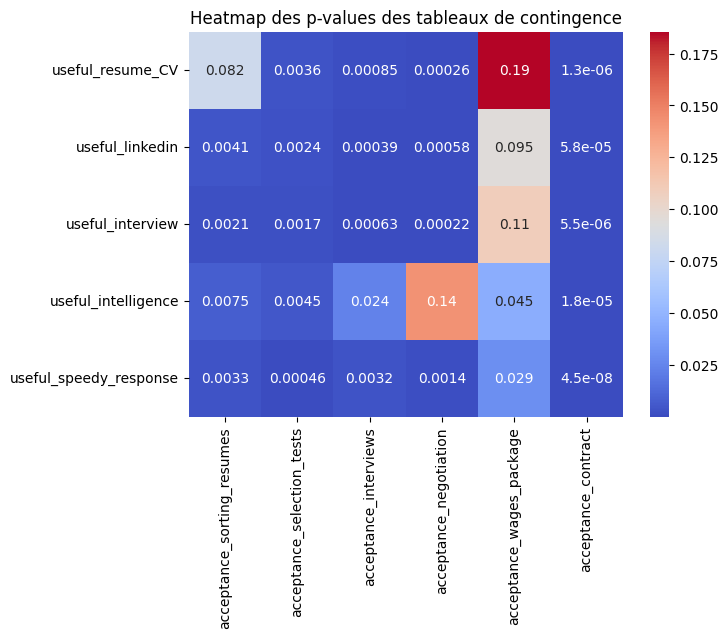

In [788]:
create_heatmap(df, usefulness_columns, acceptance_columns)

## Evaluation de la relation entre utilité perçue et la facilité d'usage

In [789]:
df['score_usefulness'] = df[usefulness_columns].sum(axis=1)
df['score_easiness'] = df[easiness_columns].sum(axis=1)

In [790]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_usefulness'], df['score_easiness'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 3586.0, p-valeur : 0.0001


## Test avec le Chi Square

In [791]:
# Calcul des p-values
p_values = calculus_chi_square(df, usefulness_columns, easiness_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {i+1}: p-value = {round(p, 2)}')

Tableau de contingence 1: p-value = 0.0
Tableau de contingence 2: p-value = 0.76
Tableau de contingence 3: p-value = 0.35
Tableau de contingence 4: p-value = 0.21
Tableau de contingence 5: p-value = 0.0
Tableau de contingence 6: p-value = 0.04
Tableau de contingence 7: p-value = 0.2
Tableau de contingence 8: p-value = 0.04
Tableau de contingence 9: p-value = 0.0
Tableau de contingence 10: p-value = 0.44
Tableau de contingence 11: p-value = 0.64
Tableau de contingence 12: p-value = 0.02
Tableau de contingence 13: p-value = 0.21
Tableau de contingence 14: p-value = 0.23
Tableau de contingence 15: p-value = 0.02
Tableau de contingence 16: p-value = 0.21
Tableau de contingence 17: p-value = 0.0
Tableau de contingence 18: p-value = 0.21
Tableau de contingence 19: p-value = 0.09
Tableau de contingence 20: p-value = 0.02


In [792]:
# P-values median
p_values_median = median(p_values)
round(p_values_median, 2)

0.14

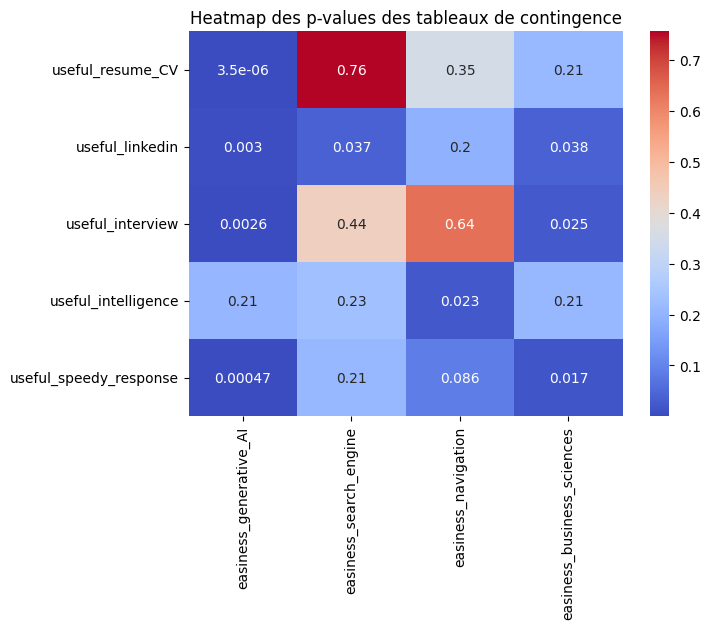

In [793]:
create_heatmap(df, usefulness_columns, easiness_columns)

## Evaluation de la relation entre utilité perçue et confiance

In [794]:
df['score_usefulness'] = df[usefulness_columns].sum(axis=1)
df['score_trust'] = df[trust_columns].sum(axis=1)

In [795]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_usefulness'], df['score_trust'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 137.0, p-valeur : 0.0


### Test avec le chi square

In [796]:
# Calcul des p-values
p_values = calculus_chi_square(df, usefulness_columns, trust_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {i+1}: p-value = {round(p, 2)}')

Tableau de contingence 1: p-value = 0.0
Tableau de contingence 2: p-value = 0.0
Tableau de contingence 3: p-value = 0.0
Tableau de contingence 4: p-value = 0.0
Tableau de contingence 5: p-value = 0.0
Tableau de contingence 6: p-value = 0.09
Tableau de contingence 7: p-value = 0.02
Tableau de contingence 8: p-value = 0.0
Tableau de contingence 9: p-value = 0.0
Tableau de contingence 10: p-value = 0.03
Tableau de contingence 11: p-value = 0.02
Tableau de contingence 12: p-value = 0.03
Tableau de contingence 13: p-value = 0.0
Tableau de contingence 14: p-value = 0.02
Tableau de contingence 15: p-value = 0.01
Tableau de contingence 16: p-value = 0.02
Tableau de contingence 17: p-value = 0.0
Tableau de contingence 18: p-value = 0.02
Tableau de contingence 19: p-value = 0.01
Tableau de contingence 20: p-value = 0.0


In [797]:
# P-values median
p_values_median = median(p_values)
round(p_values_median, 2)

0.0

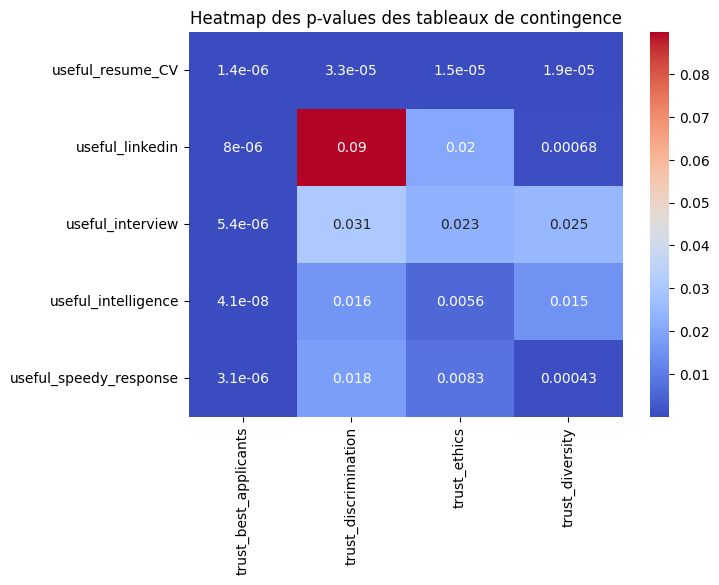

In [798]:
create_heatmap(df, usefulness_columns, trust_columns)

## Evaluation de la relation entre facilité d'usage et acceptation

In [799]:
df['score_easiness'] = df[easiness_columns].sum(axis=1)
df['score_acceptance'] = df[acceptance_columns].sum(axis=1)

In [800]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_easiness'], df['score_acceptance'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 2854.0, p-valeur : 0.0


### Test du Chi Square

In [801]:
# Calcul des p-values
p_values = calculus_chi_square(df, easiness_columns, acceptance_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {i+1}: p-value = {round(p, 2)}')

Tableau de contingence 1: p-value = 0.04
Tableau de contingence 2: p-value = 0.71
Tableau de contingence 3: p-value = 0.44
Tableau de contingence 4: p-value = 0.13
Tableau de contingence 5: p-value = 0.59
Tableau de contingence 6: p-value = 0.17
Tableau de contingence 7: p-value = 0.25
Tableau de contingence 8: p-value = 0.79
Tableau de contingence 9: p-value = 0.64
Tableau de contingence 10: p-value = 0.37
Tableau de contingence 11: p-value = 0.56
Tableau de contingence 12: p-value = 0.27
Tableau de contingence 13: p-value = 0.59
Tableau de contingence 14: p-value = 0.93
Tableau de contingence 15: p-value = 0.42
Tableau de contingence 16: p-value = 0.02
Tableau de contingence 17: p-value = 0.17
Tableau de contingence 18: p-value = 0.11
Tableau de contingence 19: p-value = 0.79
Tableau de contingence 20: p-value = 0.47
Tableau de contingence 21: p-value = 0.22
Tableau de contingence 22: p-value = 0.53
Tableau de contingence 23: p-value = 0.74
Tableau de contingence 24: p-value = 0.01


In [802]:
# P-values median
p_values_median = median(p_values)
round(p_values_median, 2)

0.43

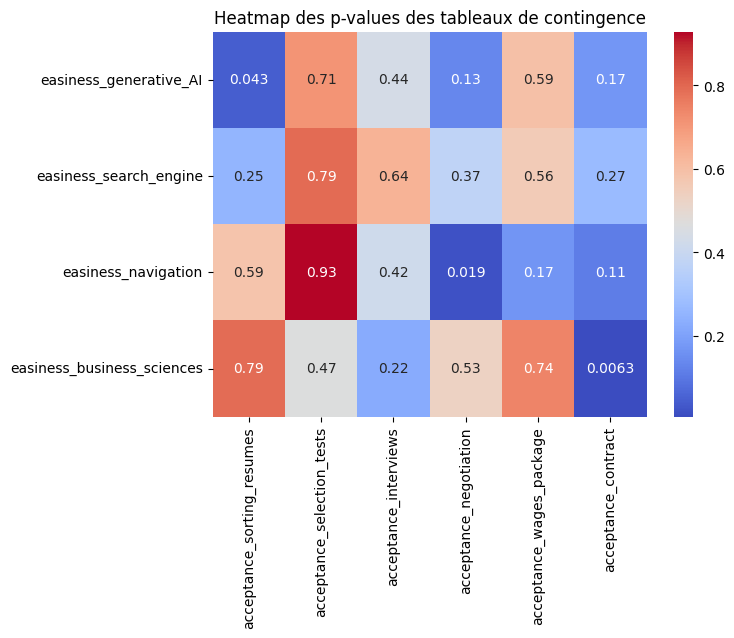

In [803]:
create_heatmap(df, easiness_columns, acceptance_columns)

## Evaluation de la relation entre facilité d'usage et confiance

In [804]:
df['score_easiness'] = df[easiness_columns].sum(axis=1)
df['score_trust'] = df[trust_columns].sum(axis=1)

In [805]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_easiness'], df['score_trust'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 148.0, p-valeur : 0.0


### Test du Chi Square

In [806]:
# Calcul des p-values
p_values = calculus_chi_square(df, easiness_columns, trust_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {i+1}: p-value = {round(p, 2)}')

Tableau de contingence 1: p-value = 0.12
Tableau de contingence 2: p-value = 0.84
Tableau de contingence 3: p-value = 0.77
Tableau de contingence 4: p-value = 0.21
Tableau de contingence 5: p-value = 0.67
Tableau de contingence 6: p-value = 0.48
Tableau de contingence 7: p-value = 0.54
Tableau de contingence 8: p-value = 0.81
Tableau de contingence 9: p-value = 0.88
Tableau de contingence 10: p-value = 0.26
Tableau de contingence 11: p-value = 0.73
Tableau de contingence 12: p-value = 0.36
Tableau de contingence 13: p-value = 0.3
Tableau de contingence 14: p-value = 0.23
Tableau de contingence 15: p-value = 0.18
Tableau de contingence 16: p-value = 0.24


In [807]:
# P-values median
p_values_median = median(p_values)
round(p_values_median, 2)

0.42

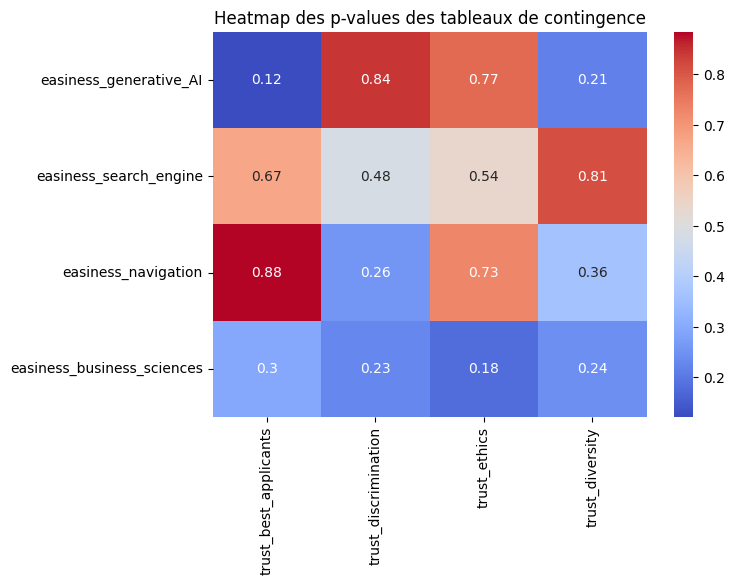

In [808]:
create_heatmap(df, easiness_columns, trust_columns)

## Evaluation de la relation entre confiance et acceptation

In [809]:
df['score_trust'] = df[trust_columns].sum(axis=1)
df['score_acceptance'] = df[acceptance_columns].sum(axis=1)

In [810]:
# Calcul du test de Wilcoxon des rangs signés
stat, p = stats.wilcoxon(df['score_trust'], df['score_acceptance'])

# Affichage des résultats
print("Résultats du test de Wilcoxon :")
print(f"Statistique de test : {stat}, p-valeur : {round(p, 4)}")

Résultats du test de Wilcoxon :
Statistique de test : 705.0, p-valeur : 0.0


### Test du Chi Square

In [811]:
# Calcul des p-values
p_values = calculus_chi_square(df, trust_columns, acceptance_columns)

# Affichage des p-values
for i, p in enumerate(p_values):
    print(f'Tableau de contingence {i+1}: p-value = {round(p, 2)}')

Tableau de contingence 1: p-value = 0.0
Tableau de contingence 2: p-value = 0.0
Tableau de contingence 3: p-value = 0.0
Tableau de contingence 4: p-value = 0.0
Tableau de contingence 5: p-value = 0.0
Tableau de contingence 6: p-value = 0.0
Tableau de contingence 7: p-value = 0.01
Tableau de contingence 8: p-value = 0.0
Tableau de contingence 9: p-value = 0.0
Tableau de contingence 10: p-value = 0.0
Tableau de contingence 11: p-value = 0.01
Tableau de contingence 12: p-value = 0.0
Tableau de contingence 13: p-value = 0.05
Tableau de contingence 14: p-value = 0.0
Tableau de contingence 15: p-value = 0.0
Tableau de contingence 16: p-value = 0.01
Tableau de contingence 17: p-value = 0.01
Tableau de contingence 18: p-value = 0.15
Tableau de contingence 19: p-value = 0.0
Tableau de contingence 20: p-value = 0.0
Tableau de contingence 21: p-value = 0.0
Tableau de contingence 22: p-value = 0.0
Tableau de contingence 23: p-value = 0.0
Tableau de contingence 24: p-value = 0.04


In [812]:
# P-values median
p_values_median = median(p_values)
round(p_values_median, 2)

0.0

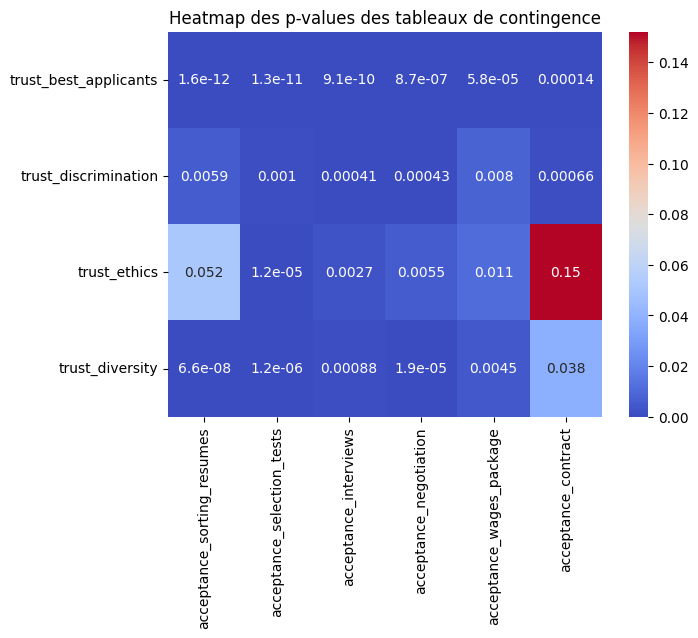

In [813]:
create_heatmap(df, trust_columns, acceptance_columns)

## Relation entre l'acceptation et l'âge 

# Visualisation des résultats catégoriels

## Visualisation du tableau de résultats

In [814]:
# visualize the Dataframe with categories
cat_df = cat_df.drop(columns="misc_free_text")
cat_df

,useful_resume_CV,useful_linkedin,useful_interview,useful_intelligence,useful_speedy_response,easiness_generative_AI,easiness_search_engine,easiness_navigation,easiness_business_sciences,trust_best_applicants,...,acceptance_negotiation,acceptance_wages_package,acceptance_contract,ethics_privacy,ethics_carbon_footprint,ethics_no_discrimination,ethics_fairness_for_applicants,ethics_diversity,misc_recruiter_uses_AI,misc_age_category
0,Plutôt opposé,Assez favorable,Totalement opposé,Plutôt opposé,Assez favorable,à l'aise,Plutôt à l'aise,Plutôt à l'aise,Plutôt à l'aise,Très faible,...,Favorable,"Ni réticent, ni favorable",Favorable,C'est plutôt important,C'est important ou secondaire,C'est très important,C'est très important,C'est important ou secondaire,C'est important,25-34 ans
1,Totalement opposé,Plutôt opposé,Plutôt opposé,"Ni favorable, ni opposé","Ni favorable, ni opposé",Plutôt à l'aise,à l'aise,Plutôt à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Réticent,Très réticent,Réticent,C'est plutôt important,NaN,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans
2,Assez favorable,Tout à fait favorable,Tout à fait favorable,Plutôt opposé,Tout à fait favorable,Plutôt à l'aise,Plutôt à l'aise,"Ni aisance, ni difficultés","Ni aisance, ni difficultés",Très faible,...,Réticent,Réticent,Favorable,C'est très important,C'est plutôt secondaire,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est important,45-54 ans
3,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Plutôt à l'aise,à l'aise,à l'aise,à l'aise,Faible,...,Très réticent,Très réticent,"Ni réticent, ni favorable",C'est plutôt important,C'est plutôt secondaire,C'est plutôt important,C'est très important,C'est important ou secondaire,C'est essentiel,55-64 ans
4,"Ni favorable, ni opposé",Plutôt opposé,Assez favorable,"Ni favorable, ni opposé","Ni favorable, ni opposé",Quelques difficultés,En difficulté,En difficulté,Quelques difficultés,"Ni faible, ni élevé",...,Très réticent,Réticent,"Ni réticent, ni favorable",C'est très secondaire,NaN,C'est très secondaire,C'est très secondaire,C'est très secondaire,C'est essentiel,55-64 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Assez favorable,"Ni favorable, ni opposé",Tout à fait favorable,Plutôt opposé,Assez favorable,à l'aise,à l'aise,à l'aise,à l'aise,Très faible,...,Très réticent,Très réticent,"Ni réticent, ni favorable",C'est très important,C'est important ou secondaire,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est essentiel,18-24 ans
157,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,Tout à fait favorable,à l'aise,Plutôt à l'aise,Plutôt à l'aise,à l'aise,Faible,...,Très réticent,"Ni réticent, ni favorable",Favorable,C'est très important,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est plutôt important,C'est important,18-24 ans
158,Assez favorable,Assez favorable,Tout à fait favorable,Tout à fait favorable,Assez favorable,à l'aise,à l'aise,à l'aise,à l'aise,Faible,...,Très réticent,Très réticent,Favorable,C'est très important,C'est plutôt important,C'est très important,C'est très important,C'est très important,C'est essentiel,45-54 ans
159,Tout à fait favorable,Assez favorable,Assez favorable,"Ni favorable, ni opposé",Tout à fait favorable,à l'aise,à l'aise,à l'aise,Plutôt à l'aise,"Ni faible, ni élevé",...,Très réticent,Très réticent,Réticent,C'est très important,C'est plutôt important,C'est très important,C'est très important,C'est très important,C'est essentiel,18-24 ans


## Visualisation des résultats pour l'utilité perçue

In [815]:
import matplotlib.pyplot as plt

### Préparation des données

In [816]:
# List of columns to analyze
usefulness_columns

# List of ordered categories 
ordered_cats_usefulness = list(reverse_likert_mapping_usefulness.values())

# Check out the outcome
print(usefulness_columns)
print(ordered_cats_usefulness)

['useful_resume_CV', 'useful_linkedin', 'useful_interview', 'useful_intelligence', 'useful_speedy_response']
['Totalement opposé', 'Plutôt opposé', 'Ni favorable, ni opposé', 'Assez favorable', 'Tout à fait favorable']


In [817]:
ordinal_counts = cat_df[usefulness_columns].apply(lambda x: pd.Series(x.value_counts(), index=ordered_cats_usefulness)).fillna(0).astype(int)
ordinal_counts_transposed = ordinal_counts.T

In [818]:
ordinal_counts_transposed

,Totalement opposé,Plutôt opposé,"Ni favorable, ni opposé",Assez favorable,Tout à fait favorable
useful_resume_CV,22,19,22,46,52
useful_linkedin,19,21,29,54,38
useful_interview,18,19,31,41,52
useful_intelligence,18,16,37,45,45
useful_speedy_response,17,19,34,47,44


In [819]:
colors = {"Totalement opposé": "red", "Plutôt opposé": "orange", "Ni favorable, ni opposé": "grey", "Assez favorable": "limegreen", "Tout à fait favorable": "green"}

### Visualisation de l'utilité perçue

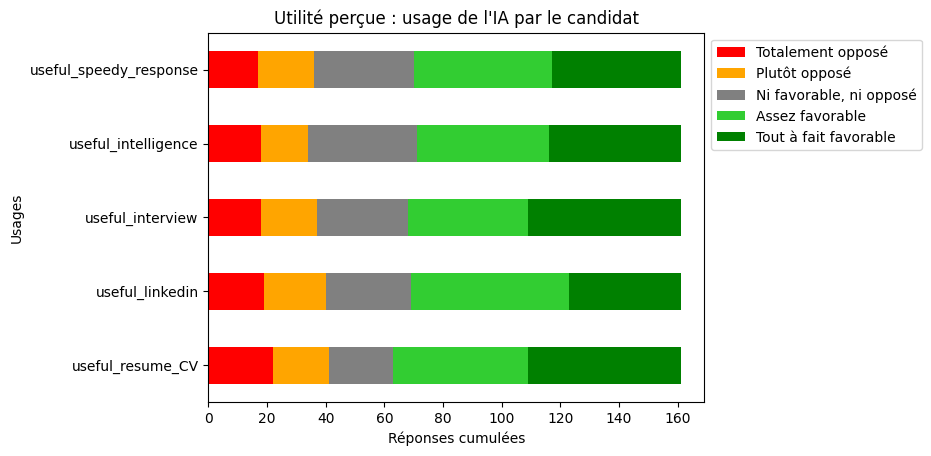

In [821]:
ax = ordinal_counts_transposed.plot.barh(stacked=True, 
                                         color=colors, 
                                         title="Utilité perçue : usage de l'IA par le candidat",
                                        ylabel="Usages",
                                        xlabel="Réponses cumulées")
ax.legend(bbox_to_anchor=(1.0, 1.0))

## Visualisation des résultats pour la facilité d'usage

### Préparation des données

In [822]:
# List of columns to analyze
easiness_columns

# List of ordered categories 
ordered_cats_easiness = list(reverse_likert_mapping_easiness.values())

# Check out the outcome
print(easiness_columns)
print(ordered_cats_easiness)

['easiness_generative_AI', 'easiness_search_engine', 'easiness_navigation', 'easiness_business_sciences']
["à l'aise", "Plutôt à l'aise", 'Ni aisance, ni difficultés', 'Quelques difficultés', 'En difficulté']


In [823]:
colors = {"En difficulté": "red", "Quelques difficultés": "orange", "Ni aisance, ni difficultés": "grey", "Plutôt à l'aise": "limegreen", "à l'aise": "green"}

### Visualisation de la facilité d'usage perçue

In [824]:
ordinal_counts = cat_df[easiness_columns].apply(lambda x: pd.Series(x.value_counts(), index=ordered_cats_easiness)).fillna(0).astype(int)
ordinal_counts_transposed = ordinal_counts.T

In [825]:
ordinal_counts_transposed

,à l'aise,Plutôt à l'aise,"Ni aisance, ni difficultés",Quelques difficultés,En difficulté
easiness_generative_AI,48,56,37,17,3
easiness_search_engine,90,38,27,4,2
easiness_navigation,75,49,27,5,5
easiness_business_sciences,35,61,53,10,2


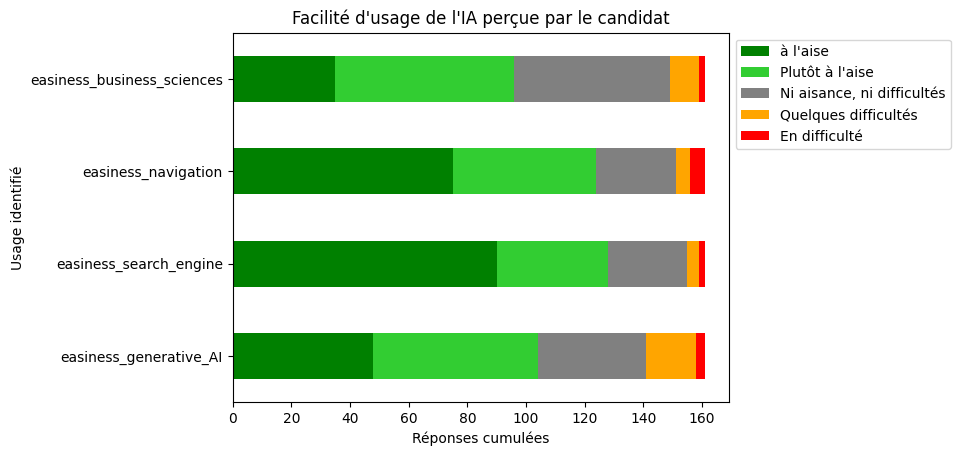

In [826]:
ax = ordinal_counts_transposed.plot.barh(stacked=True, 
                                         color=colors, 
                                         title="Facilité d'usage de l'IA perçue par le candidat",
                                        ylabel="Usage identifié",
                                        xlabel="Réponses cumulées")
ax.legend(bbox_to_anchor=(1.0, 1.0))

## Visualisation des résultats pour la crédibilité du recruteur utilisant l'IA

### Préparation des données

In [827]:
# List of columns to analyze
trust_columns

# List of ordered categories 
ordered_cats_trust = list(reverse_likert_mapping_trust.values())

# Check out the outcome
print(trust_columns)
print(ordered_cats_trust)

['trust_best_applicants', 'trust_discrimination', 'trust_ethics', 'trust_diversity']
['Très faible', 'Faible', 'Ni faible, ni élevé', 'Elevé', 'Très élevé']


In [828]:
colors = {"Très faible": "red", "Faible": "orange", "Ni faible, ni élevé": "grey", "Elevé": "limegreen", "Très élevé": "green"}

### Visualisation du niveau de crédibilité

In [829]:
ordinal_counts = cat_df[trust_columns].apply(lambda x: pd.Series(x.value_counts(), index=ordered_cats_trust)).fillna(0).astype(int)
ordinal_counts_transposed = ordinal_counts.T

In [830]:
ordinal_counts_transposed

,Très faible,Faible,"Ni faible, ni élevé",Elevé,Très élevé
trust_best_applicants,36,57,44,24,0
trust_discrimination,32,52,46,27,4
trust_ethics,47,46,49,18,1
trust_diversity,37,48,54,20,2


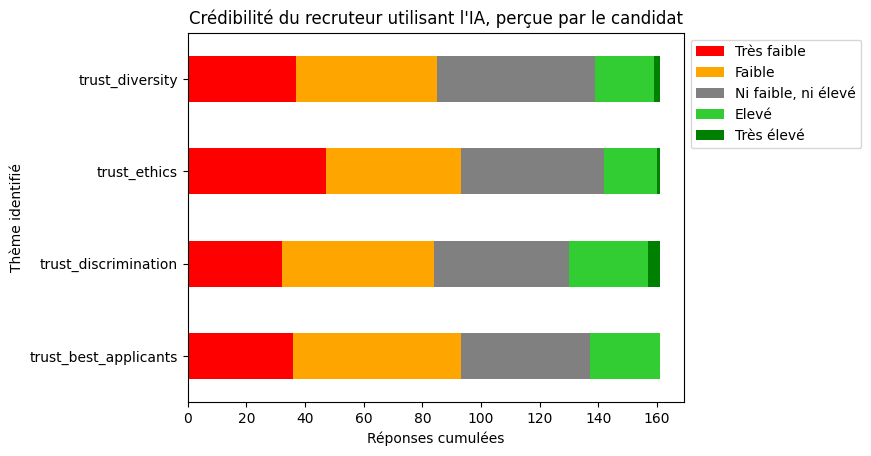

In [831]:
ax = ordinal_counts_transposed.plot.barh(stacked=True, 
                                         color=colors, 
                                         title="Crédibilité du recruteur utilisant l'IA, perçue par le candidat",
                                        ylabel="Thème identifié",
                                        xlabel="Réponses cumulées")
ax.legend(bbox_to_anchor=(1.0, 1.0))

## Visualisation de l'acceptation de l'IA par le candidat lors d'un recrutement

### Préparation des données

In [832]:
# List of columns to analyze
acceptance_columns

# List of ordered categories 
ordered_cats_acceptance = list(reverse_likert_mapping_acceptance.values())

# Check out the outcome
print(acceptance_columns)
print(ordered_cats_acceptance)

['acceptance_sorting_resumes', 'acceptance_selection_tests', 'acceptance_interviews', 'acceptance_negotiation', 'acceptance_wages_package', 'acceptance_contract']
['Très réticent', 'Réticent', 'Ni réticent, ni favorable', 'Favorable', 'Très favorable']


In [833]:
colors = {"Très réticent": "red", "Réticent": "orange", "Ni réticent, ni favorable": "grey", "Favorable": "limegreen", "Très favorable": "green"}

### Visualisation du niveau d'acceptation

In [834]:
ordinal_counts = cat_df[acceptance_columns].apply(lambda x: pd.Series(x.value_counts(), index=ordered_cats_acceptance)).fillna(0).astype(int)
ordinal_counts_transposed = ordinal_counts.T

In [835]:
ordinal_counts_transposed

,Très réticent,Réticent,"Ni réticent, ni favorable",Favorable,Très favorable
acceptance_sorting_resumes,35,44,40,38,4
acceptance_selection_tests,33,50,41,33,4
acceptance_interviews,74,53,24,10,0
acceptance_negotiation,65,40,38,18,0
acceptance_wages_package,74,48,27,10,2
acceptance_contract,44,28,37,43,9


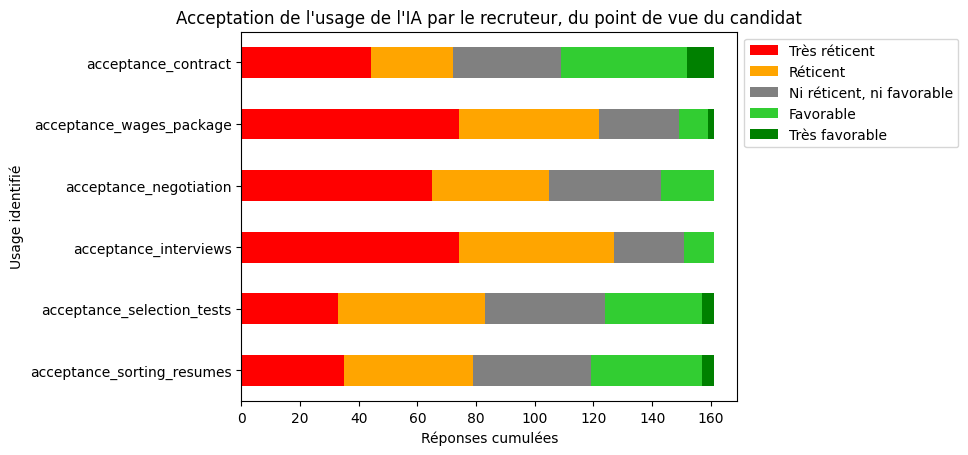

In [836]:
ax = ordinal_counts_transposed.plot.barh(stacked=True, 
                                         color=colors, 
                                         title="Acceptation de l'usage de l'IA par le recruteur, du point de vue du candidat",
                                        ylabel="Usage identifié",
                                        xlabel="Réponses cumulées")
ax.legend(bbox_to_anchor=(1.0, 1.0))

## Visualisation de l'importance qu'un candidat apporte à l'éthique

### Préparation des données

In [837]:
# List of columns to analyze
ethics_columns

# List of ordered categories 
ordered_cats_ethics = list(reverse_likert_mapping_ethics.values())

# Check out the outcome
print(ethics_columns)
print(ordered_cats_ethics)

['ethics_privacy', 'ethics_carbon_footprint', 'ethics_no_discrimination', 'ethics_fairness_for_applicants', 'ethics_diversity']
["C'est très important", "C'est plutôt important", "C'est important ou secondaire", "C'est plutôt secondaire", "C'est très secondaire"]


In [838]:
colors = {"C'est très important": "red", "C'est plutôt important": "orange", "C'est important ou secondaire": "grey", "C'est plutôt secondaire": "limegreen", "C'est très secondaire": "green"}

In [839]:
ordinal_counts = cat_df[ethics_columns].apply(lambda x: pd.Series(x.value_counts(), index=ordered_cats_ethics)).fillna(0).astype(int)
ordinal_counts_transposed = ordinal_counts.T

In [840]:
ordinal_counts_transposed

,C'est très important,C'est plutôt important,C'est important ou secondaire,C'est plutôt secondaire,C'est très secondaire
ethics_privacy,124,31,4,0,2
ethics_carbon_footprint,32,40,34,29,24
ethics_no_discrimination,68,60,19,7,7
ethics_fairness_for_applicants,88,53,14,0,6
ethics_diversity,51,49,27,13,19


### Visualisation de l'importance accordée à l'éthique

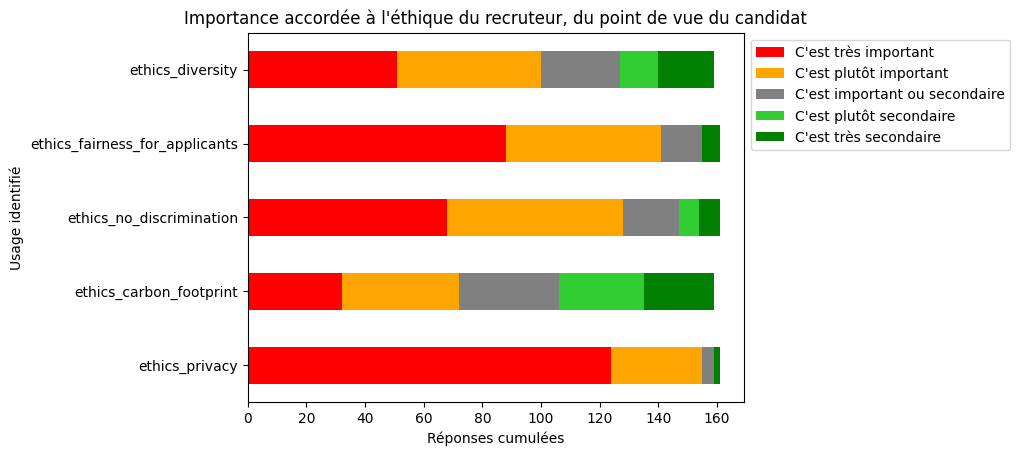

In [841]:
ax = ordinal_counts_transposed.plot.barh(stacked=True, 
                                         color=colors, 
                                         title="Importance accordée à l'éthique du recruteur, du point de vue du candidat",
                                        ylabel="Usage identifié",
                                        xlabel="Réponses cumulées")
ax.legend(bbox_to_anchor=(1.0, 1.0))

## Visualisation de la relation entre âge et acceptation

Text(0.5, 0, '')

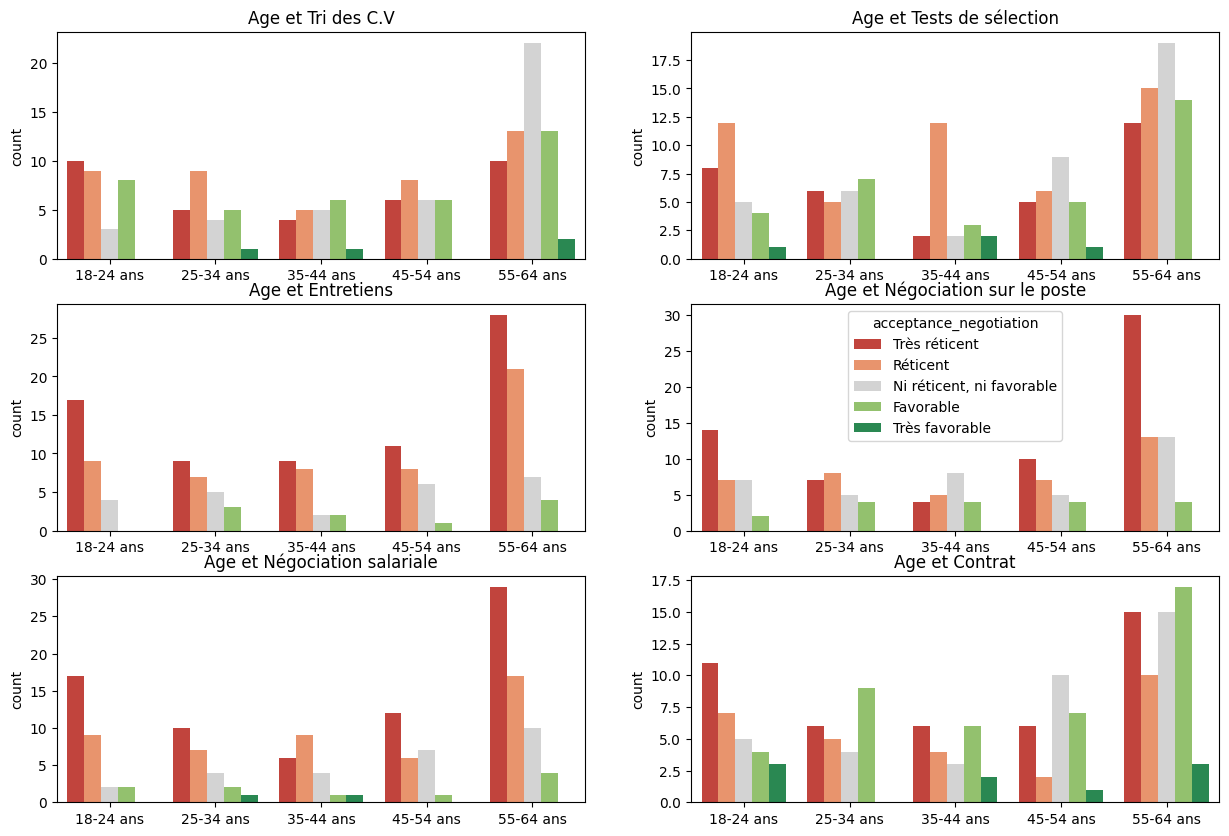

In [868]:
# Création des graphiques
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

age_order = ["18-24 ans", "25-34 ans", "35-44 ans", "45-54 ans", "55-64 ans"]
likert_order = ["Très réticent", "Réticent", "Ni réticent, ni favorable", "Favorable", "Très favorable"]
colors = ['#d73027', '#fc8d59', '#D3D3D3', '#91cf60', '#1a9850']

# Graphique Age vs Tri des C.V
sns.countplot(x='misc_age_category', hue='acceptance_sorting_resumes', data=df_age_acceptance, ax=axes[0, 0], 
              order=age_order, hue_order=likert_order, palette=colors, legend=False)
axes[0, 0].set_title('Age et Tri des C.V')
axes[0,0].set_xlabel("")

# Graphique Age vs Tests
sns.countplot(x='misc_age_category', hue='acceptance_selection_tests', data=df_age_acceptance, ax=axes[0, 1], 
              order=age_order, hue_order=likert_order, palette=colors, legend=False)
axes[0, 1].set_title('Age et Tests de sélection')
axes[0,1].set_xlabel("")

# Graphique Age vs Entretiens
sns.countplot(x='misc_age_category', hue='acceptance_interviews', data=df_age_acceptance, ax=axes[1, 0], 
              order=age_order, hue_order=likert_order, palette=colors, legend=False)
axes[1, 0].set_title('Age et Entretiens')
axes[1,0].set_xlabel("")

# Graphique Age vs Négociation
sns.countplot(x='misc_age_category', hue='acceptance_negotiation', data=df_age_acceptance, ax=axes[1, 1], order=age_order, hue_order=likert_order, palette=colors)
axes[1, 1].set_title('Age et Négociation sur le poste')
axes[1,1].set_xlabel("")

# Graphique Age vs Salaires
sns.countplot(x='misc_age_category', hue='acceptance_wages_package', data=df_age_acceptance, ax=axes[2, 0], 
              order=age_order, hue_order=likert_order, palette=colors, legend=False)
axes[2, 0].set_title('Age et Négociation salariale')
axes[2,0].set_xlabel("")

# Graphique Age vs Salaires
sns.countplot(x='misc_age_category', hue='acceptance_contract', data=df_age_acceptance, ax=axes[2, 1], 
              order=age_order, hue_order=likert_order, palette=colors, legend=False)
axes[2, 1].set_title('Age et Contrat')
axes[2,1].set_xlabel("")
